In [9]:
import numpy as np
import sys
import yaml
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import io
import math
import pandas as pd
import mplhep as hep
sys.path.append('../utils')
from fast_analysis_utils import ExtractFromYaml

hep.style.use("ALICE")

def plot_syst(x, ex, y, ey, ax, color, width):
    for i in range(len(x)):
        box_x = x[i] - ex
        box_y = y[i] - ey[i]
        box_width = 2 * ex
        box_height = 2 * ey[i]
        rect = patches.Rectangle((box_x, box_y), box_width, box_height, fill=False, edgecolor=color, linewidth=width)
        ax.add_patch(rect)

ppCrossSection =  59.4e6 #nb
BrJpsiToMuMu =  0.05961
deltaY = 1.5

In [10]:
# Min Bias data - Std association
dfJpsiRawYieldMinBiasStdAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC24_pass1_min_bias/cross_section_std_assoc/LHC24/systematic_sig_Jpsi.txt', sep=' ')
ptMinMinBiasStdAssoc = dfJpsiRawYieldMinBiasStdAssocVsPt["x_min"]
ptMaxMinBiasStdAssoc = dfJpsiRawYieldMinBiasStdAssocVsPt["x_max"]
ptMinBiasStdAssoc = (ptMinMinBiasStdAssoc + ptMaxMinBiasStdAssoc) / 2.
errPtMinBiasStdAssoc = (ptMaxMinBiasStdAssoc - ptMinMinBiasStdAssoc) / 2.
rawYieldMinBiasStdAssocVsPt = dfJpsiRawYieldMinBiasStdAssocVsPt["val"] / (2 * errPtMinBiasStdAssoc * deltaY)
statRawYieldMinBiasStdAssocVsPt = dfJpsiRawYieldMinBiasStdAssocVsPt["stat"] / (2 * errPtMinBiasStdAssoc * deltaY)
systRawYieldMinBiasStdAssocVsPt = dfJpsiRawYieldMinBiasStdAssocVsPt["syst"] / (2 * errPtMinBiasStdAssoc * deltaY)

# Min Bias data - Time association
#dfJpsiRawYieldMinBiasTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC24_pass1_min_bias/cross_section_time_assoc/LHC24/systematic_sig_Jpsi.txt', sep=' ')
dfJpsiRawYieldMinBiasTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC24_pass1_min_bias/cross_section_time_assoc/LHC24_NEW/systematic_sig_Jpsi.txt', sep=' ')
ptMinMinBiasTimeAssoc = dfJpsiRawYieldMinBiasTimeAssocVsPt["x_min"]
ptMaxMinBiasTimeAssoc = dfJpsiRawYieldMinBiasTimeAssocVsPt["x_max"]
ptMinBiasTimeAssoc = (ptMinMinBiasTimeAssoc + ptMaxMinBiasTimeAssoc) / 2.
errPtMinBiasTimeAssoc = (ptMaxMinBiasTimeAssoc - ptMinMinBiasTimeAssoc) / 2.
rawYieldMinBiasTimeAssocVsPt = dfJpsiRawYieldMinBiasTimeAssocVsPt["val"] / (2 * errPtMinBiasTimeAssoc * deltaY)
statRawYieldMinBiasTimeAssocVsPt = dfJpsiRawYieldMinBiasTimeAssocVsPt["stat"] / (2 * errPtMinBiasTimeAssoc * deltaY)
systRawYieldMinBiasTimeAssocVsPt = dfJpsiRawYieldMinBiasTimeAssocVsPt["syst"] / (2 * errPtMinBiasTimeAssoc * deltaY)

# Skimmed data - Standard association
dfJpsiRawYieldSkimmedStdAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC24_pass1_skimmed/charmonia_cross_section_std_assoc/LHC24af/systematic_sig_Jpsi.txt', sep=' ')
ptMinSkimmedStdAssoc = dfJpsiRawYieldSkimmedStdAssocVsPt["x_min"]
ptMaxSkimmedStdAssoc = dfJpsiRawYieldSkimmedStdAssocVsPt["x_max"]
ptSkimmedStdAssoc = (ptMinSkimmedStdAssoc + ptMaxSkimmedStdAssoc) / 2.
errPtSkimmedStdAssoc = (ptMaxSkimmedStdAssoc - ptMinSkimmedStdAssoc) / 2.
rawYieldSkimmedStdAssocVsPt = dfJpsiRawYieldSkimmedStdAssocVsPt["val"] / (2 * errPtSkimmedStdAssoc * deltaY)
statRawYieldSkimmedStdAssocVsPt = dfJpsiRawYieldSkimmedStdAssocVsPt["stat"] / (2 * errPtSkimmedStdAssoc * deltaY)
systRawYieldSkimmedStdAssocVsPt = dfJpsiRawYieldSkimmedStdAssocVsPt["syst"] / (2 * errPtSkimmedStdAssoc * deltaY)

# Skimmed data - Standard association from HF
dfJpsiRawYieldSkimmedFromHfStdAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC24_pass1_skimmed/charmonia_cross_section_std_assoc/LHC24af_fromHF/systematic_sig_Jpsi.txt', sep=' ')
rawYieldSkimmedFromHfStdAssocVsPt = dfJpsiRawYieldSkimmedFromHfStdAssocVsPt["val"] / (2 * errPtSkimmedStdAssoc * deltaY)
statRawYieldSkimmedFromHfStdAssocVsPt = dfJpsiRawYieldSkimmedFromHfStdAssocVsPt["stat"] / (2 * errPtSkimmedStdAssoc * deltaY)
systRawYieldSkimmedFromHfStdAssocVsPt = dfJpsiRawYieldSkimmedFromHfStdAssocVsPt["syst"] / (2 * errPtSkimmedStdAssoc * deltaY)

# Skimmed data - Time association
dfJpsiRawYieldSkimmedTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC24_pass1_skimmed/charmonia_cross_section_time_assoc/LHC24af/systematic_sig_Jpsi.txt', sep=' ')
ptMinSkimmedTimeAssoc = dfJpsiRawYieldSkimmedTimeAssocVsPt["x_min"]
ptMaxSkimmedTimeAssoc = dfJpsiRawYieldSkimmedTimeAssocVsPt["x_max"]
ptSkimmedTimeAssoc = (ptMinSkimmedTimeAssoc + ptMaxSkimmedTimeAssoc) / 2.
errPtSkimmedTimeAssoc = (ptMaxSkimmedTimeAssoc - ptMinSkimmedTimeAssoc) / 2.
rawYieldSkimmedTimeAssocVsPt = dfJpsiRawYieldSkimmedTimeAssocVsPt["val"] / (2 * errPtSkimmedTimeAssoc * deltaY)
statRawYieldSkimmedTimeAssocVsPt = dfJpsiRawYieldSkimmedTimeAssocVsPt["stat"] / (2 * errPtSkimmedTimeAssoc * deltaY)
systRawYieldSkimmedTimeAssocVsPt = dfJpsiRawYieldSkimmedTimeAssocVsPt["syst"] / (2 * errPtSkimmedTimeAssoc * deltaY)

# Skimmed data - Time association from HF
dfJpsiRawYieldSkimmedFromHfTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC24_pass1_skimmed/charmonia_cross_section_time_assoc/LHC24af_fromHF/systematic_sig_Jpsi.txt', sep=' ')
rawYieldSkimmedFromHfTimeAssocVsPt = dfJpsiRawYieldSkimmedFromHfTimeAssocVsPt["val"] / (2 * errPtSkimmedTimeAssoc * deltaY)
statRawYieldSkimmedFromHfTimeAssocVsPt = dfJpsiRawYieldSkimmedFromHfTimeAssocVsPt["stat"] / (2 * errPtSkimmedTimeAssoc * deltaY)
systRawYieldSkimmedFromHfTimeAssocVsPt = dfJpsiRawYieldSkimmedFromHfTimeAssocVsPt["syst"] / (2 * errPtSkimmedTimeAssoc * deltaY)

# Run 2 results
filePath = "/Users/lucamicheletti/GITHUB/dq_run3_analyses/psi2S_jpsi_ratio/results/HEPData-77781-v1-yaml/Table1.yaml"
ptCenters, ptWidths, crossSectionRun2VsPt, statCrossSectionRun2VsPt, systCrossSectionRun2VsPt = ExtractFromYaml(filePath)

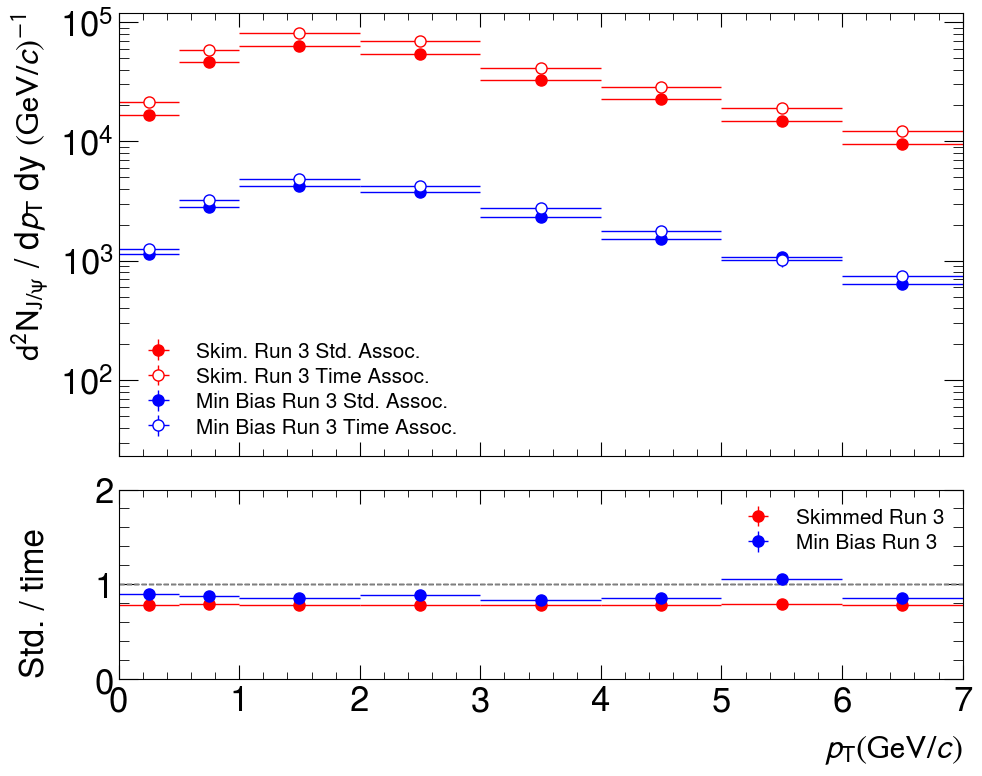

In [11]:
# Raw yield
ratioRun3SkimmedStdAssocToTimeAssocVsPt = rawYieldSkimmedStdAssocVsPt / rawYieldSkimmedTimeAssocVsPt
statRatioRun3SkimmedStdAssocToTimeAssocVsPt = rawYieldSkimmedStdAssocVsPt * 0.

#ratioRun3SkimmedFromHfStdAssocToTimeAssocVsPt = rawYieldSkimmedFromHfStdAssocVsPt / rawYieldSkimmedFromHfTimeAssocVsPt
#statRatioRun3SkimmedFromHfStdAssocToTimeAssocVsPt = rawYieldSkimmedFromHfStdAssocVsPt * 0.

ratioRun3MinBiasStdAssocToTimeAssocVsPt = rawYieldMinBiasStdAssocVsPt / rawYieldMinBiasTimeAssocVsPt
statRatioRun3MinBiasStdAssocToTimeAssocVsPt = rawYieldMinBiasStdAssocVsPt * 0.

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [7, 3]})
ax1.set_ylabel(r'$d^{2}N_{\rm{J}/\psi}$ / d$\it{p}_{\rm{T}}$ dy $(\rm{GeV}/\it{c})^{-1}$', fontsize=24, labelpad=10)
ax1.yaxis.set_label_coords(-0.08, 1.)
ax1.set_yscale('log')
#ax1.set_ylim(1, 3e2)
ax1.set_xlim(0, 7)
ax1.tick_params(axis='x', labelbottom=False)

ax1.errorbar(ptSkimmedStdAssoc, rawYieldSkimmedStdAssocVsPt, xerr=errPtSkimmedStdAssoc, yerr=statRawYieldSkimmedStdAssocVsPt, fmt='o', color='red', ecolor='red', markerfacecolor='red', markersize=8, label=r'Skim. Run 3 Std. Assoc.')
ax1.errorbar(ptSkimmedTimeAssoc, rawYieldSkimmedTimeAssocVsPt, xerr=errPtSkimmedTimeAssoc, yerr=statRawYieldSkimmedTimeAssocVsPt, fmt='o', color='red', ecolor='red', markerfacecolor='white', markersize=8, label=r'Skim. Run 3 Time Assoc.')

#ax1.errorbar(ptSkimmedStdAssoc, rawYieldSkimmedFromHfStdAssocVsPt, xerr=errPtSkimmedStdAssoc, yerr=statRawYieldSkimmedFromHfStdAssocVsPt, fmt='o', color='forestgreen', ecolor='forestgreen', markerfacecolor='forestgreen', markersize=8, label=r'Skim. from HF Run 3 Std. Assoc.')
#ax1.errorbar(ptSkimmedTimeAssoc, rawYieldSkimmedFromHfTimeAssocVsPt, xerr=errPtSkimmedTimeAssoc, yerr=statRawYieldSkimmedFromHfTimeAssocVsPt, fmt='o', color='forestgreen', ecolor='forestgreen', markerfacecolor='white', markersize=8, label=r'Skim. from HF Run 3 Time Assoc.')

ax1.errorbar(ptMinBiasStdAssoc, rawYieldMinBiasStdAssocVsPt, xerr=errPtMinBiasStdAssoc, yerr=statRawYieldMinBiasStdAssocVsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='blue', markersize=8, label=r'Min Bias Run 3 Std. Assoc.')
ax1.errorbar(ptMinBiasTimeAssoc, rawYieldMinBiasTimeAssocVsPt, xerr=errPtMinBiasTimeAssoc, yerr=statRawYieldMinBiasTimeAssocVsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='white', markersize=8, label=r'Min Bias Run 3 Time Assoc.')

ax1.legend(fontsize=15)

ax2.set_xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$', fontsize=24, labelpad=10)
ax2.set_ylabel(r'Std. / time', fontsize=24, labelpad=10)
ax2.yaxis.set_label_coords(-0.08, 0.8)
ax2.set_xlim(0, 7)
ax2.set_ylim(0, 2)
ax2.grid(False)
ax2.axhline(y=1., color='black', linestyle='--')

ax2.errorbar(ptSkimmedStdAssoc, ratioRun3SkimmedStdAssocToTimeAssocVsPt, xerr=errPtSkimmedStdAssoc, yerr=statRatioRun3SkimmedStdAssocToTimeAssocVsPt, fmt='o', color='red', ecolor='red', markerfacecolor='red', markersize=8, label=r'Skimmed Run 3')
#ax2.errorbar(ptSkimmedStdAssoc, ratioRun3SkimmedFromHfStdAssocToTimeAssocVsPt, xerr=errPtSkimmedStdAssoc, yerr=statRatioRun3SkimmedFromHfStdAssocToTimeAssocVsPt, fmt='o', color='forestgreen', ecolor='forestgreen', markerfacecolor='forestgreen', markersize=8, label=r'Skimmed from HF Run 3')
ax2.errorbar(ptSkimmedStdAssoc, ratioRun3MinBiasStdAssocToTimeAssocVsPt, xerr=errPtSkimmedStdAssoc, yerr=statRatioRun3MinBiasStdAssocToTimeAssocVsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='blue', markersize=8, label=r'Min Bias Run 3')
ax2.axhline(1, color='gray', linestyle='--', linewidth=1)  # Linea di riferimento

ax2.legend(fontsize=15)

plt.tight_layout()
plt.show()

In [12]:
# Signal per event
# collision efficiency makes no sense --> contains the impact of the trigger
nMBEvtsStdAssoc = 5.65906e+09 # BC cuts: 4.41837e+09
#nMBEvtsTimeAssoc = 1.3852e+10 # BC cuts: 1.08169e+10 --> old train probably bugged
nMBEvtsTimeAssoc = 5.60543e+09 # BC cuts: 4.37668e+09
nMBEvtsSkimmedStdAssoc = 1.06967e+11 * 0.82617 # [ZorroInfo] = 2.08403e+12; [ZorroSel] = 1.06967e+11; [ZorroInfo] * collision efficiency = 5.03577e+09; [ZorroSel] * collision efficiency = 2.58472e+08 [BC efficiency = 0.82617]
nMBEvtsSkimmedTimeAssoc = 1.06662e+11 * 0.82599 # [ZorroInfo] = 1.99932e+12; [ZorroSel] = 1.06662e+11; [ZorroInfo] * collision efficiency = 4.82532e+09; [ZorroSel] * collision efficiency = 2.57427e+08 [BC efficiency = 0.82599] 
nMBEvtsSkimmedFromHfStdAssoc = 1.10701e+11 * 0.825716 # [ZorroInfo] = 4.88588e+12; [ZorroSel] = 1.10701e+11; [ZorroInfo] * collision efficiency = 1.2191e+10; [ZorroSel] * collision efficiency = 2.76215e+08 [BC efficiency = 0.825716]
nMBEvtsSkimmedFromHfTimeAssoc = 1.09855e+11 * 0.825947 # [ZorroInfo] = 4.70135e+12; [ZorroSel] = 1.09855e+11; [ZorroInfo] * collision efficiency = 1.17398e+10; [ZorroSel] * collision efficiency = 2.7432e+08 [BC efficiency = 0.825947] 

# Min Bias data - Std association
rawYieldNormMinBiasStdAssocVsPt = rawYieldMinBiasStdAssocVsPt / nMBEvtsStdAssoc
statRawYieldNormMinBiasStdAssocVsPt = statRawYieldMinBiasStdAssocVsPt / nMBEvtsStdAssoc
systRawYieldNormMinBiasStdAssocVsPt = systRawYieldMinBiasStdAssocVsPt / nMBEvtsStdAssoc

# Min Bias data - Time association
rawYieldNormMinBiasTimeAssocVsPt = rawYieldMinBiasTimeAssocVsPt / nMBEvtsTimeAssoc
statRawYieldNormMinBiasTimeAssocVsPt = statRawYieldMinBiasTimeAssocVsPt / nMBEvtsTimeAssoc
systRawYieldNormMinBiasTimeAssocVsPt = systRawYieldMinBiasTimeAssocVsPt / nMBEvtsTimeAssoc

# Skimmed data - Standard association
rawYieldNormSkimmedStdAssocVsPt = rawYieldSkimmedStdAssocVsPt / nMBEvtsSkimmedStdAssoc
statRawYieldNormSkimmedStdAssocVsPt = statRawYieldSkimmedStdAssocVsPt / nMBEvtsSkimmedStdAssoc
systRawYieldNormSkimmedStdAssocVsPt = systRawYieldSkimmedStdAssocVsPt / nMBEvtsSkimmedStdAssoc

# Skimmed data - Time association
rawYieldNormSkimmedTimeAssocVsPt = rawYieldSkimmedTimeAssocVsPt / nMBEvtsSkimmedTimeAssoc
statRawYieldNormSkimmedTimeAssocVsPt = statRawYieldSkimmedTimeAssocVsPt / nMBEvtsSkimmedTimeAssoc
systRawYieldNormSkimmedTimeAssocVsPt = systRawYieldSkimmedTimeAssocVsPt / nMBEvtsSkimmedTimeAssoc

# Skimmed data - Standard association from HF
rawYieldNormSkimmedFromHfStdAssocVsPt = rawYieldSkimmedFromHfStdAssocVsPt / nMBEvtsSkimmedFromHfStdAssoc
statRawYieldNormSkimmedFromHfStdAssocVsPt = statRawYieldSkimmedFromHfStdAssocVsPt / nMBEvtsSkimmedFromHfStdAssoc
systRawYieldNormSkimmedFromHfStdAssocVsPt = systRawYieldSkimmedFromHfStdAssocVsPt / nMBEvtsSkimmedFromHfStdAssoc

# Skimmed data - Time association from HF
rawYieldNormSkimmedFromHfTimeAssocVsPt = rawYieldSkimmedFromHfTimeAssocVsPt / nMBEvtsSkimmedFromHfTimeAssoc
statRawYieldNormSkimmedFromHfTimeAssocVsPt = statRawYieldSkimmedFromHfTimeAssocVsPt / nMBEvtsSkimmedFromHfTimeAssoc
systRawYieldNormSkimmedFromHfTimeAssocVsPt = systRawYieldSkimmedFromHfTimeAssocVsPt / nMBEvtsSkimmedFromHfTimeAssoc

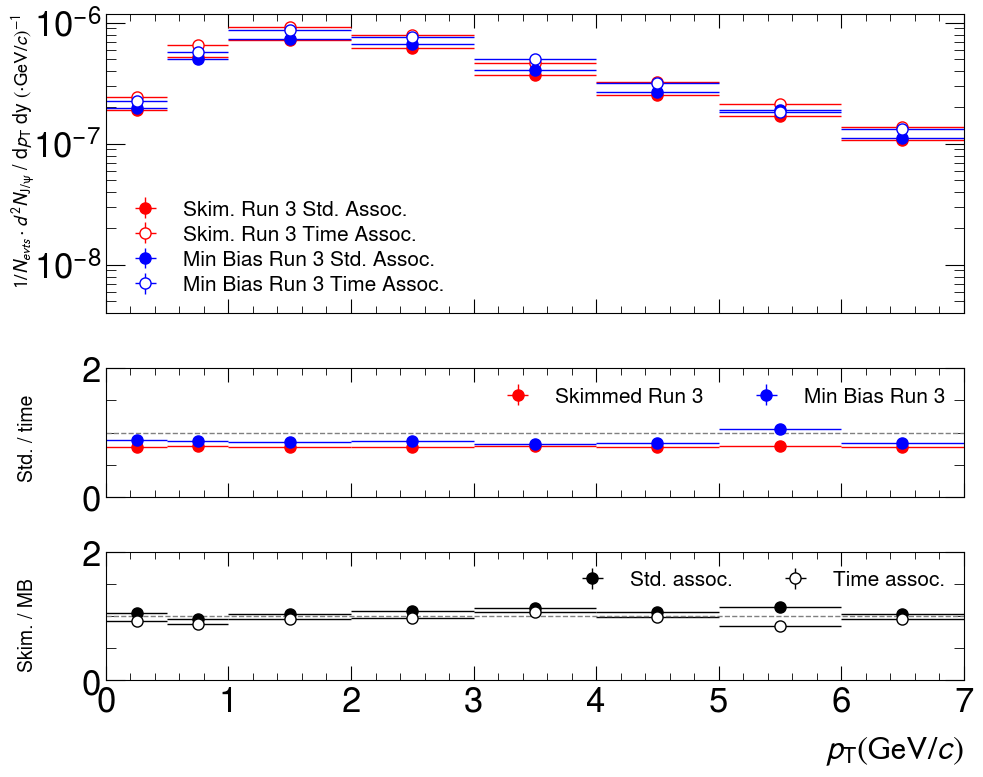

In [13]:
################################################
# Raw yield normalized to the number of events #
################################################
ratioNormRun3SkimmedStdAssocToTimeAssocVsPt = rawYieldNormSkimmedStdAssocVsPt / rawYieldNormSkimmedTimeAssocVsPt
statRatioNormRun3SkimmedStdAssocToTimeAssocVsPt = rawYieldNormSkimmedStdAssocVsPt * 0.

ratioNormRun3MinBiasStdAssocToTimeAssocVsPt = rawYieldNormMinBiasStdAssocVsPt / rawYieldNormMinBiasTimeAssocVsPt
statRatioNormRun3MinBiasStdAssocToTimeAssocVsPt = rawYieldNormMinBiasStdAssocVsPt * 0.

ratioNormRun3MinBiasStdAssocToSkimmedStdAssocVsPt = rawYieldNormMinBiasStdAssocVsPt / rawYieldNormSkimmedStdAssocVsPt
statRatioNormRun3MinBiasStdAssocToSkimmedStdAssocVsPt = rawYieldNormMinBiasStdAssocVsPt * 0.

ratioNormRun3MinBiasTimeAssocToSkimmedTimeAssocVsPt = rawYieldNormMinBiasTimeAssocVsPt / rawYieldNormSkimmedTimeAssocVsPt
statRatioNormRun3MinBiasTimeAssocToSkimmedTimeAssocVsPt = rawYieldNormMinBiasTimeAssocVsPt * 0.

fig, axes = plt.subplots(3, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [7, 3, 3]})
axes[0].set_ylabel(r'$1/\it{N_{evts}} \cdot d^{2}N_{\rm{J}/\psi}$ / d$\it{p}_{\rm{T}}$ dy $(\rm{\cdot GeV}/\it{c})^{-1}$', fontsize=14, labelpad=10)
axes[0].yaxis.set_label_coords(-0.08, 1.)
axes[0].set_yscale('log')
#axes[0].set_ylim(1, 3e2)
axes[0].set_xlim(0, 7)
axes[0].tick_params(axis='x', labelbottom=False)
axes[0].errorbar(ptSkimmedStdAssoc, rawYieldNormSkimmedStdAssocVsPt, xerr=errPtSkimmedStdAssoc, yerr=statRawYieldNormSkimmedStdAssocVsPt, fmt='o', color='red', ecolor='red', markerfacecolor='red', markersize=8, label=r'Skim. Run 3 Std. Assoc.')
axes[0].errorbar(ptSkimmedTimeAssoc, rawYieldNormSkimmedTimeAssocVsPt, xerr=errPtSkimmedTimeAssoc, yerr=statRawYieldNormSkimmedTimeAssocVsPt, fmt='o', color='red', ecolor='red', markerfacecolor='white', markersize=8, label=r'Skim. Run 3 Time Assoc.')
axes[0].errorbar(ptMinBiasStdAssoc, rawYieldNormMinBiasStdAssocVsPt, xerr=errPtMinBiasStdAssoc, yerr=statRawYieldNormMinBiasStdAssocVsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='blue', markersize=8, label=r'Min Bias Run 3 Std. Assoc.')
axes[0].errorbar(ptMinBiasTimeAssoc, rawYieldNormMinBiasTimeAssocVsPt, xerr=errPtMinBiasTimeAssoc, yerr=statRawYieldNormMinBiasTimeAssocVsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='white', markersize=8, label=r'Min Bias Run 3 Time Assoc.')
axes[0].legend(fontsize=15)

axes[1].set_ylabel(r'Std. / time', fontsize=14, labelpad=10)
axes[1].yaxis.set_label_coords(-0.08, 0.8)
axes[1].set_xlim(0, 7)
axes[1].set_ylim(0, 2)
axes[1].tick_params(axis='x', labelbottom=False)
axes[1].grid(False)
axes[1].errorbar(ptSkimmedStdAssoc, ratioNormRun3SkimmedStdAssocToTimeAssocVsPt, xerr=errPtSkimmedStdAssoc, yerr=statRatioNormRun3SkimmedStdAssocToTimeAssocVsPt, fmt='o', color='red', ecolor='red', markerfacecolor='red', markersize=8, label=r'Skimmed Run 3')
axes[1].errorbar(ptSkimmedStdAssoc, ratioNormRun3MinBiasStdAssocToTimeAssocVsPt, xerr=errPtSkimmedStdAssoc, yerr=statRatioNormRun3MinBiasStdAssocToTimeAssocVsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='blue', markersize=8, label=r'Min Bias Run 3')
axes[1].axhline(1, color='gray', linestyle='--', linewidth=1)
axes[1].legend(fontsize=15, ncol=2)

axes[2].set_xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$', fontsize=24, labelpad=10)
axes[2].set_ylabel(r'Skim. / MB', fontsize=14, labelpad=10)
axes[2].yaxis.set_label_coords(-0.08, 0.8)
axes[2].set_xlim(0, 7)
axes[2].set_ylim(0, 2)
axes[2].tick_params(axis='x', labelbottom=True)
axes[2].grid(False)
axes[2].errorbar(ptSkimmedStdAssoc, ratioNormRun3MinBiasStdAssocToSkimmedStdAssocVsPt, xerr=errPtSkimmedStdAssoc, yerr=statRatioNormRun3MinBiasStdAssocToSkimmedStdAssocVsPt, fmt='o', color='black', ecolor='black', markerfacecolor='black', markersize=8, label=r'Std. assoc.')
axes[2].errorbar(ptSkimmedStdAssoc, ratioNormRun3MinBiasTimeAssocToSkimmedTimeAssocVsPt, xerr=errPtSkimmedStdAssoc, yerr=statRatioNormRun3MinBiasTimeAssocToSkimmedTimeAssocVsPt, fmt='o', color='black', ecolor='black', markerfacecolor='white', markersize=8, label=r'Time assoc.')
axes[2].axhline(1, color='gray', linestyle='--', linewidth=1)
axes[2].legend(fontsize=15, ncol=2)

plt.tight_layout()
plt.show()

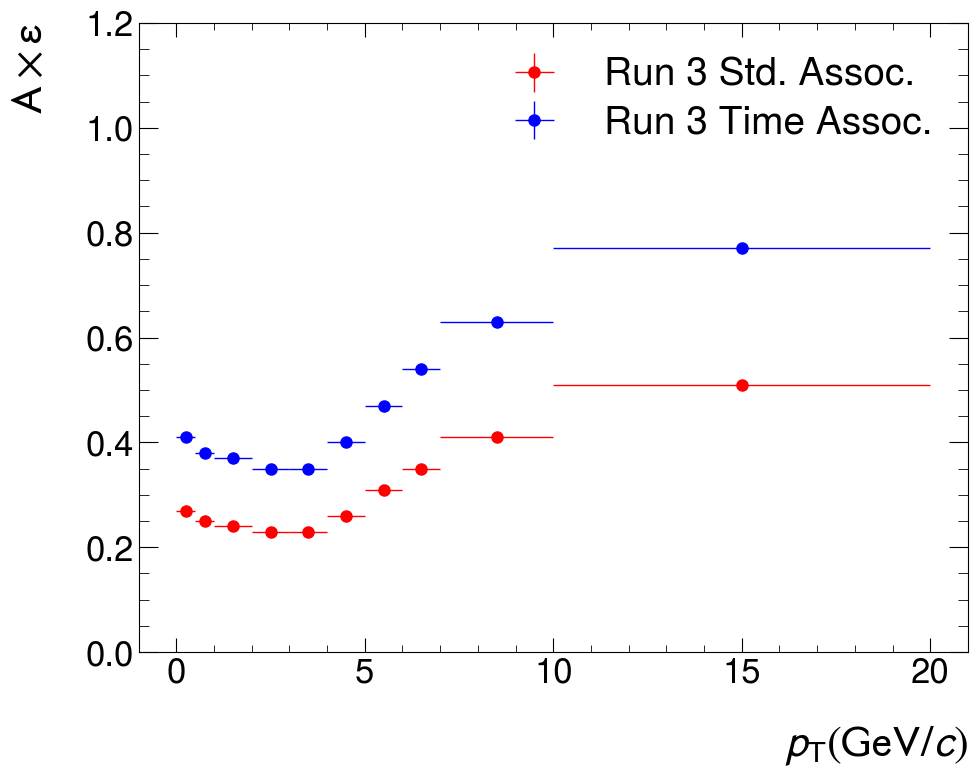

In [14]:
# Axe
dfJpsiAxeStdAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_run3_analyses/charmonia_cross_section_pp/axe_jpsi_std_assoc.txt', sep=' ')
axeStdAssocVsPt = dfJpsiAxeStdAssocVsPt["val"]
statAxeStdAssocVsPt = dfJpsiAxeStdAssocVsPt["stat"]
systAxeStdAssocVsPt = dfJpsiAxeStdAssocVsPt["syst"]

dfJpsiAxeTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_run3_analyses/charmonia_cross_section_pp/axe_jpsi_time_assoc.txt', sep=' ')
axeTimeAssocVsPt = dfJpsiAxeTimeAssocVsPt["val"]
statAxeTimeAssocVsPt = dfJpsiAxeTimeAssocVsPt["stat"]
systAxeTimeAssocVsPt = dfJpsiAxeTimeAssocVsPt["syst"]

fig, ax = plt.subplots(figsize=(10, 8))
plot_syst(ptSkimmedStdAssoc, 0.125, axeStdAssocVsPt, systAxeStdAssocVsPt, ax, 'darkred', 2)
plot_syst(ptSkimmedTimeAssoc, 0.125, axeTimeAssocVsPt, systAxeTimeAssocVsPt, ax, 'royalblue', 2)
plt.errorbar(ptSkimmedStdAssoc, axeStdAssocVsPt, xerr=errPtSkimmedStdAssoc, yerr=statAxeStdAssocVsPt, fmt='o', color='red', ecolor='red', markerfacecolor='red', markersize=8, label=r'Run 3 Std. Assoc.')
plt.errorbar(ptSkimmedTimeAssoc, axeTimeAssocVsPt, xerr=errPtSkimmedTimeAssoc, yerr=statAxeTimeAssocVsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='blue', markersize=8, label=r'Run 3 Time Assoc.')
plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$A\times\varepsilon$')
plt.ylim(0, 1.2)
#plt.yscale('log')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

In [15]:
# Min Bias data - Std association
rawYieldNormCorrMinBiasStdAssocVsPt = rawYieldNormMinBiasStdAssocVsPt / axeStdAssocVsPt
statRawYieldNormCorrMinBiasStdAssocVsPt = statRawYieldNormMinBiasStdAssocVsPt / axeStdAssocVsPt
systRawYieldNormCorrMinBiasStdAssocVsPt = systRawYieldNormMinBiasStdAssocVsPt / axeStdAssocVsPt

# Min Bias data - Time association
rawYieldNormCorrMinBiasTimeAssocVsPt = rawYieldNormMinBiasTimeAssocVsPt / axeTimeAssocVsPt
statRawYieldNormCorrMinBiasTimeAssocVsPt = statRawYieldNormMinBiasTimeAssocVsPt / axeTimeAssocVsPt
systRawYieldNormCorrMinBiasTimeAssocVsPt = systRawYieldNormMinBiasTimeAssocVsPt / axeTimeAssocVsPt

# Skimmed data - Standard association
rawYieldNormCorrSkimmedStdAssocVsPt = rawYieldNormSkimmedStdAssocVsPt / axeStdAssocVsPt
statRawYieldNormCorrSkimmedStdAssocVsPt = statRawYieldNormSkimmedStdAssocVsPt / axeStdAssocVsPt
systRawYieldNormCorrSkimmedStdAssocVsPt = systRawYieldNormSkimmedStdAssocVsPt / axeStdAssocVsPt

# Skimmed data - Time association
rawYieldNormCorrSkimmedTimeAssocVsPt = rawYieldNormSkimmedTimeAssocVsPt / axeTimeAssocVsPt
statRawYieldNormCorrSkimmedTimeAssocVsPt = statRawYieldNormSkimmedTimeAssocVsPt / axeTimeAssocVsPt
systRawYieldNormCorrSkimmedTimeAssocVsPt = systRawYieldNormSkimmedTimeAssocVsPt / axeTimeAssocVsPt

# Skimmed data - Standard association from HF
rawYieldNormCorrSkimmedFromHfStdAssocVsPt = rawYieldNormSkimmedFromHfStdAssocVsPt / axeStdAssocVsPt
statRawYieldNormCorrSkimmedFromHfStdAssocVsPt = statRawYieldNormSkimmedFromHfStdAssocVsPt / axeStdAssocVsPt
systRawYieldNormCorrSkimmedFromHfStdAssocVsPt = systRawYieldNormSkimmedFromHfStdAssocVsPt / axeStdAssocVsPt

# Skimmed data - Time association from HF
rawYieldNormCorrSkimmedFromHfTimeAssocVsPt = rawYieldNormSkimmedFromHfTimeAssocVsPt / axeTimeAssocVsPt
statRawYieldNormCorrSkimmedFromHfTimeAssocVsPt = statRawYieldNormSkimmedFromHfTimeAssocVsPt / axeTimeAssocVsPt
systRawYieldNormCorrSkimmedFromHfTimeAssocVsPt = systRawYieldNormSkimmedFromHfTimeAssocVsPt / axeTimeAssocVsPt

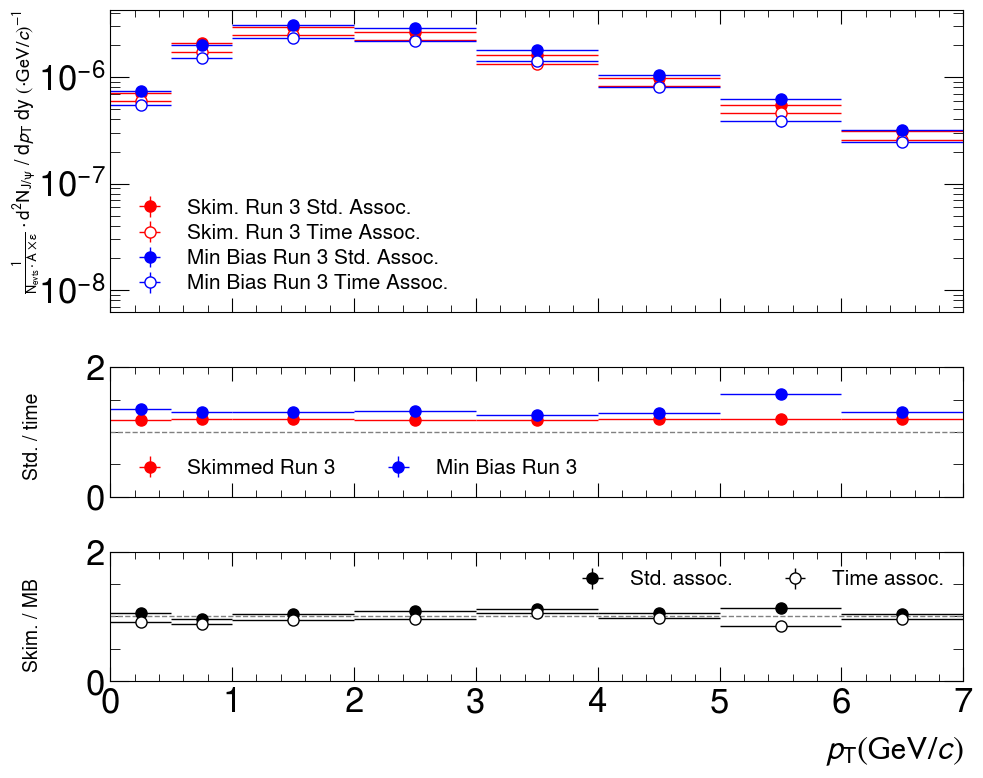

In [16]:
##############################################################
# Raw yield normalized and Axe corr. to the number of events #
##############################################################
ratioNormCorrRun3SkimmedStdAssocToTimeAssocVsPt = rawYieldNormCorrSkimmedStdAssocVsPt / rawYieldNormCorrSkimmedTimeAssocVsPt
statRatioNormCorrRun3SkimmedStdAssocToTimeAssocVsPt = rawYieldNormCorrSkimmedStdAssocVsPt * 0.

ratioNormCorrRun3MinBiasStdAssocToTimeAssocVsPt = rawYieldNormCorrMinBiasStdAssocVsPt / rawYieldNormCorrMinBiasTimeAssocVsPt
statRatioNormCorrRun3MinBiasStdAssocToTimeAssocVsPt = rawYieldNormCorrMinBiasStdAssocVsPt * 0.

ratioNormCorrRun3MinBiasStdAssocToSkimmedStdAssocVsPt = rawYieldNormCorrMinBiasStdAssocVsPt / rawYieldNormCorrSkimmedStdAssocVsPt
statRatioNormCorrRun3MinBiasStdAssocToSkimmedStdAssocVsPt = rawYieldNormCorrMinBiasStdAssocVsPt * 0.

ratioNormCorrRun3MinBiasTimeAssocToSkimmedTimeAssocVsPt = rawYieldNormCorrMinBiasTimeAssocVsPt / rawYieldNormCorrSkimmedTimeAssocVsPt
statRatioNormCorrRun3MinBiasTimeAssocToSkimmedTimeAssocVsPt = rawYieldNormCorrMinBiasTimeAssocVsPt * 0.

fig, axes = plt.subplots(3, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [7, 3, 3]})
axes[0].set_ylabel(r'$\frac{1}{N_{evts} \cdot A\times\varepsilon} \cdot d^{2}N_{\rm{J}/\psi}$ / d$\it{p}_{\rm{T}}$ dy $(\rm{\cdot GeV}/\it{c})^{-1}$', fontsize=14, labelpad=10)
axes[0].yaxis.set_label_coords(-0.08, 1.)
axes[0].set_yscale('log')
#axes[0].set_ylim(1, 3e2)
axes[0].set_xlim(0, 7)
axes[0].tick_params(axis='x', labelbottom=False)
axes[0].errorbar(ptSkimmedStdAssoc, rawYieldNormCorrSkimmedStdAssocVsPt, xerr=errPtSkimmedStdAssoc, yerr=statRawYieldNormCorrSkimmedStdAssocVsPt, fmt='o', color='red', ecolor='red', markerfacecolor='red', markersize=8, label=r'Skim. Run 3 Std. Assoc.')
axes[0].errorbar(ptSkimmedTimeAssoc, rawYieldNormCorrSkimmedTimeAssocVsPt, xerr=errPtSkimmedTimeAssoc, yerr=statRawYieldNormCorrSkimmedTimeAssocVsPt, fmt='o', color='red', ecolor='red', markerfacecolor='white', markersize=8, label=r'Skim. Run 3 Time Assoc.')
axes[0].errorbar(ptMinBiasStdAssoc, rawYieldNormCorrMinBiasStdAssocVsPt, xerr=errPtMinBiasStdAssoc, yerr=statRawYieldNormCorrMinBiasStdAssocVsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='blue', markersize=8, label=r'Min Bias Run 3 Std. Assoc.')
axes[0].errorbar(ptMinBiasTimeAssoc, rawYieldNormCorrMinBiasTimeAssocVsPt, xerr=errPtMinBiasTimeAssoc, yerr=statRawYieldNormCorrMinBiasTimeAssocVsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='white', markersize=8, label=r'Min Bias Run 3 Time Assoc.')
axes[0].legend(fontsize=15)

axes[1].set_ylabel(r'Std. / time', fontsize=14, labelpad=10)
axes[1].yaxis.set_label_coords(-0.08, 0.8)
axes[1].set_xlim(0, 7)
axes[1].set_ylim(0, 2)
axes[1].tick_params(axis='x', labelbottom=False)
axes[1].grid(False)
axes[1].errorbar(ptSkimmedStdAssoc, ratioNormCorrRun3SkimmedStdAssocToTimeAssocVsPt, xerr=errPtSkimmedStdAssoc, yerr=statRatioNormCorrRun3SkimmedStdAssocToTimeAssocVsPt, fmt='o', color='red', ecolor='red', markerfacecolor='red', markersize=8, label=r'Skimmed Run 3')
axes[1].errorbar(ptSkimmedStdAssoc, ratioNormCorrRun3MinBiasStdAssocToTimeAssocVsPt, xerr=errPtSkimmedStdAssoc, yerr=statRatioNormCorrRun3MinBiasStdAssocToTimeAssocVsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='blue', markersize=8, label=r'Min Bias Run 3')
axes[1].axhline(1, color='gray', linestyle='--', linewidth=1)
axes[1].legend(fontsize=15, ncol=2)

axes[2].set_xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$', fontsize=24, labelpad=10)
axes[2].set_ylabel(r'Skim. / MB', fontsize=14, labelpad=10)
axes[2].yaxis.set_label_coords(-0.08, 0.8)
axes[2].set_xlim(0, 7)
axes[2].set_ylim(0, 2)
axes[2].tick_params(axis='x', labelbottom=True)
axes[2].grid(False)
axes[2].errorbar(ptSkimmedStdAssoc, ratioNormCorrRun3MinBiasStdAssocToSkimmedStdAssocVsPt, xerr=errPtSkimmedStdAssoc, yerr=statRatioNormCorrRun3MinBiasStdAssocToSkimmedStdAssocVsPt, fmt='o', color='black', ecolor='black', markerfacecolor='black', markersize=8, label=r'Std. assoc.')
axes[2].errorbar(ptSkimmedStdAssoc, ratioNormCorrRun3MinBiasTimeAssocToSkimmedTimeAssocVsPt, xerr=errPtSkimmedStdAssoc, yerr=statRatioNormCorrRun3MinBiasTimeAssocToSkimmedTimeAssocVsPt, fmt='o', color='black', ecolor='black', markerfacecolor='white', markersize=8, label=r'Time assoc.')
axes[2].axhline(1, color='gray', linestyle='--', linewidth=1)
axes[2].legend(fontsize=15, ncol=2)

plt.tight_layout()
plt.show()

In [17]:
# Min Bias data - Std association
crossSectionMinBiasStdAssocVsPt = (rawYieldNormCorrMinBiasStdAssocVsPt * ppCrossSection) / (BrJpsiToMuMu)
statCrossSectionMinBiasStdAssocVsPt = (statRawYieldNormCorrMinBiasStdAssocVsPt * ppCrossSection) / (BrJpsiToMuMu)
systCrossSectionMinBiasStdAssocVsPt = (systRawYieldNormCorrMinBiasStdAssocVsPt * ppCrossSection) / (BrJpsiToMuMu)

# Min Bias data - Time association
crossSectionMinBiasTimeAssocVsPt = (rawYieldNormCorrMinBiasTimeAssocVsPt * ppCrossSection) / (BrJpsiToMuMu)
statCrossSectionMinBiasTimeAssocVsPt = (statRawYieldNormCorrMinBiasTimeAssocVsPt * ppCrossSection) / (BrJpsiToMuMu)
systCrossSectionMinBiasTimeAssocVsPt = (systRawYieldNormCorrMinBiasTimeAssocVsPt * ppCrossSection) / (BrJpsiToMuMu)

# Skimmed data - Standard association
crossSectionSkimmedStdAssocVsPt = (rawYieldNormCorrSkimmedStdAssocVsPt * ppCrossSection) / (BrJpsiToMuMu)
statCrossSectionSkimmedStdAssocVsPt = (statRawYieldNormCorrSkimmedStdAssocVsPt * ppCrossSection) / (BrJpsiToMuMu)
systCrossSectionSkimmedStdAssocVsPt = (systRawYieldNormCorrSkimmedStdAssocVsPt * ppCrossSection) / (BrJpsiToMuMu)

# Skimmed data - Time association
crossSectionSkimmedTimeAssocVsPt = (rawYieldNormCorrSkimmedTimeAssocVsPt * ppCrossSection) / (BrJpsiToMuMu)
statCrossSectionSkimmedTimeAssocVsPt = (statRawYieldNormCorrSkimmedTimeAssocVsPt * ppCrossSection) / (BrJpsiToMuMu)
systCrossSectionSkimmedTimeAssocVsPt = (systRawYieldNormCorrSkimmedTimeAssocVsPt * ppCrossSection) / (BrJpsiToMuMu)

# Skimmed data - Standard association from HF
crossSectionSkimmedFromHfStdAssocVsPt = (rawYieldNormCorrSkimmedFromHfStdAssocVsPt * ppCrossSection) / (BrJpsiToMuMu)
statCrossSectionSkimmedFromHfStdAssocVsPt = (statRawYieldNormCorrSkimmedFromHfStdAssocVsPt * ppCrossSection) / (BrJpsiToMuMu)
systCrossSectionSkimmedFromHfStdAssocVsPt = (systRawYieldNormCorrSkimmedFromHfStdAssocVsPt * ppCrossSection) / (BrJpsiToMuMu)

# Skimmed data - Time association from HF
crossSectionSkimmedFromHfTimeAssocVsPt = (rawYieldNormCorrSkimmedFromHfTimeAssocVsPt * ppCrossSection) / (BrJpsiToMuMu)
statCrossSectionSkimmedFromHfTimeAssocVsPt = (statRawYieldNormCorrSkimmedFromHfTimeAssocVsPt * ppCrossSection) / (BrJpsiToMuMu)
systCrossSectionSkimmedFromHfTimeAssocVsPt = (systRawYieldNormCorrSkimmedFromHfTimeAssocVsPt * ppCrossSection) / (BrJpsiToMuMu)

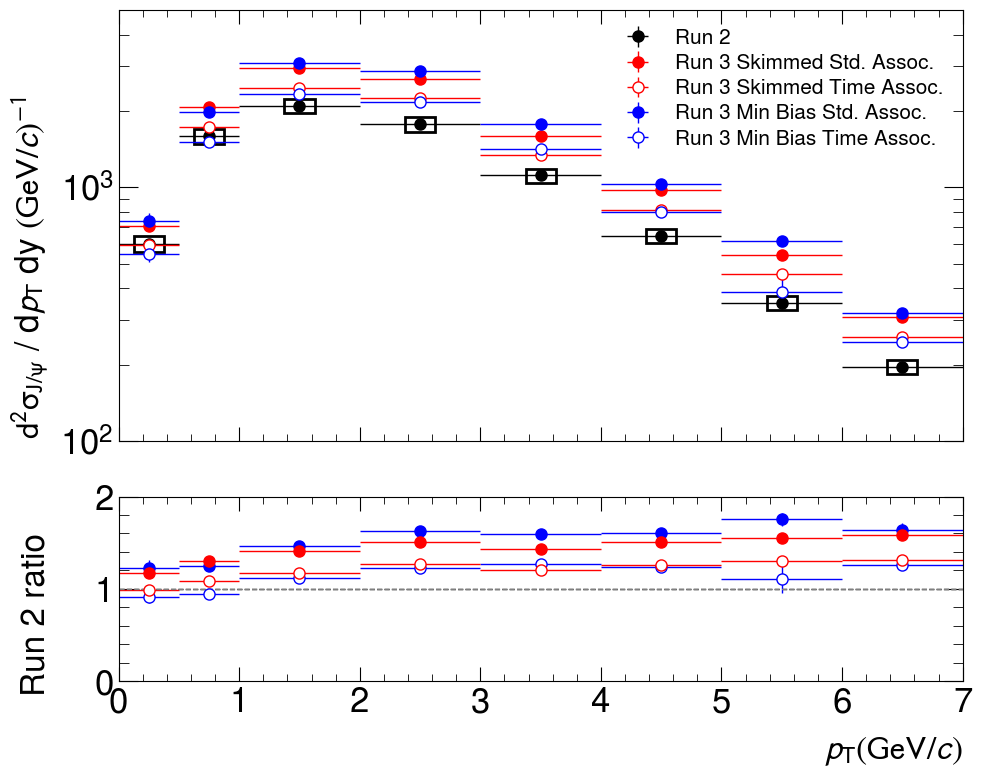

In [18]:
# Min bias
ratioRun3MinBiasStdAssocToRun2VsPt = crossSectionMinBiasStdAssocVsPt[:8] / crossSectionRun2VsPt[:8]
statRatioRun3MinBiasStdAssocToRun2VsPt = ratioRun3MinBiasStdAssocToRun2VsPt * (statCrossSectionMinBiasStdAssocVsPt[:8] / crossSectionMinBiasStdAssocVsPt[:8])
ratioRun3MinBiasTimeAssocToRun2VsPt = crossSectionMinBiasTimeAssocVsPt[:8] / crossSectionRun2VsPt[:8]
statRatioRun3MinBiasTimeAssocToRun2VsPt = ratioRun3MinBiasTimeAssocToRun2VsPt * (statCrossSectionMinBiasTimeAssocVsPt[:8] / crossSectionMinBiasTimeAssocVsPt[:8])
# Skimmed
ratioRun3SkimmedStdAssocToRun2VsPt = crossSectionSkimmedStdAssocVsPt[:8] / crossSectionRun2VsPt[:8]
statRatioRun3SkimmedStdAssocToRun2VsPt = ratioRun3SkimmedStdAssocToRun2VsPt * (statCrossSectionSkimmedStdAssocVsPt[:8] / crossSectionSkimmedStdAssocVsPt[:8])
ratioRun3SkimmedTimeAssocToRun2VsPt = crossSectionSkimmedTimeAssocVsPt[:8] / crossSectionRun2VsPt[:8]
statRatioRun3SkimmedTimeAssocToRun2VsPt = ratioRun3SkimmedTimeAssocToRun2VsPt * (statCrossSectionSkimmedTimeAssocVsPt[:8] / crossSectionSkimmedTimeAssocVsPt[:8])
# Skimmed from HF
ratioRun3SkimmedFromHfStdAssocToRun2VsPt = crossSectionSkimmedFromHfStdAssocVsPt[:8] / crossSectionRun2VsPt[:8]
statRatioRun3SkimmedFromHfStdAssocToRun2VsPt = ratioRun3SkimmedFromHfStdAssocToRun2VsPt * (statCrossSectionSkimmedFromHfStdAssocVsPt[:8] / crossSectionSkimmedFromHfStdAssocVsPt[:8])
ratioRun3SkimmedFromHfTimeAssocToRun2VsPt = crossSectionSkimmedFromHfTimeAssocVsPt[:8] / crossSectionRun2VsPt[:8]
statRatioRun3SkimmedFromHfTimeAssocToRun2VsPt = ratioRun3SkimmedFromHfTimeAssocToRun2VsPt * (statCrossSectionSkimmedFromHfTimeAssocVsPt[:8] / crossSectionSkimmedFromHfTimeAssocVsPt[:8])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [7, 3]})

ax1.set_ylabel(r'$d^{2}\sigma_{\rm{J}/\psi}$ / d$\it{p}_{\rm{T}}$ dy $(\rm{GeV}/\it{c})^{-1}$', fontsize=24, labelpad=10)
ax1.yaxis.set_label_coords(-0.08, 0.8)
ax1.set_yscale('log')
ax1.set_ylim(1e2, 5e3)
ax1.set_xlim(0, 7)
ax1.tick_params(axis='x', labelbottom=False)
plot_syst(ptCenters, 0.125, crossSectionRun2VsPt, systCrossSectionRun2VsPt, ax1, 'black', 2)
#plot_syst(ptSkimmedStdAssoc, 0.125, crossSectionSkimmedStdAssocVsPt, systCrossSectionSkimmedStdAssocVsPt, ax1, 'red', 2)
#plot_syst(ptSkimmedTimeAssoc, 0.125, crossSectionSkimmedTimeAssocVsPt, systCrossSectionSkimmedTimeAssocVsPt, ax1, 'royalblue', 2)
#plot_syst(ptMinBiasStdAssoc, 0.125, crossSectionMinBiasStdAssocVsPt, systCrossSectionMinBiasStdAssocVsPt, ax1, 'darkorange', 2)
#plot_syst(ptMinBiasTimeAssoc, 0.125, crossSectionMinBiasTimeAssocVsPt, systCrossSectionMinBiasTimeAssocVsPt, ax1, 'deepskyblue', 2)
ax1.errorbar(ptCenters, crossSectionRun2VsPt, xerr=ptWidths, yerr=statCrossSectionRun2VsPt, fmt='o', color='black', ecolor='black', markerfacecolor='black', markersize=8, label=r'Run 2')
ax1.errorbar(ptSkimmedStdAssoc, crossSectionSkimmedStdAssocVsPt, xerr=errPtSkimmedStdAssoc, yerr=statCrossSectionSkimmedStdAssocVsPt, fmt='o', color='red', ecolor='red', markerfacecolor='red', markersize=8, label=r'Run 3 Skimmed Std. Assoc.')
ax1.errorbar(ptSkimmedTimeAssoc, crossSectionSkimmedTimeAssocVsPt, xerr=errPtSkimmedTimeAssoc, yerr=statCrossSectionSkimmedTimeAssocVsPt, fmt='o', color='red', ecolor='red', markerfacecolor='white', markersize=8, label=r'Run 3 Skimmed Time Assoc.')
ax1.errorbar(ptMinBiasStdAssoc, crossSectionMinBiasStdAssocVsPt, xerr=errPtMinBiasStdAssoc, yerr=statCrossSectionMinBiasStdAssocVsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='blue', markersize=8, label=r'Run 3 Min Bias Std. Assoc.')
ax1.errorbar(ptMinBiasTimeAssoc, crossSectionMinBiasTimeAssocVsPt, xerr=errPtMinBiasTimeAssoc, yerr=statCrossSectionMinBiasTimeAssocVsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='white', markersize=8, label=r'Run 3 Min Bias Time Assoc.')
ax1.legend(fontsize=15)

ax2.set_xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$', fontsize=24, labelpad=10)
ax2.set_ylabel(r'Run 2 ratio', fontsize=24, labelpad=10)
ax2.yaxis.set_label_coords(-0.08, 0.8)
ax2.set_xlim(0, 7)
ax2.set_ylim(0, 2)
ax2.grid(False)
ax2.axhline(y=1., color='black', linestyle='--')
ax2.errorbar(ptMinBiasStdAssoc[:8], ratioRun3MinBiasStdAssocToRun2VsPt, xerr=errPtMinBiasStdAssoc[:8], yerr=statRatioRun3MinBiasStdAssocToRun2VsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='blue', markersize=8, label=r'Run 3 Min Bias Std. Assoc.')
ax2.errorbar(ptMinBiasTimeAssoc[:8], ratioRun3MinBiasTimeAssocToRun2VsPt, xerr=errPtMinBiasTimeAssoc[:8], yerr=statRatioRun3MinBiasTimeAssocToRun2VsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='white', markersize=8, label=r'Run 3 Min Bias Time Assoc.')
ax2.errorbar(ptSkimmedStdAssoc[:8], ratioRun3SkimmedStdAssocToRun2VsPt, xerr=errPtSkimmedStdAssoc[:8], yerr=statRatioRun3SkimmedStdAssocToRun2VsPt, fmt='o', color='red', ecolor='red', markerfacecolor='red', markersize=8, label=r'Run 3 Skimmed Std. Assoc.')
ax2.errorbar(ptSkimmedTimeAssoc[:8], ratioRun3SkimmedTimeAssocToRun2VsPt, xerr=errPtSkimmedTimeAssoc[:8], yerr=statRatioRun3SkimmedTimeAssocToRun2VsPt, fmt='o', color='red', ecolor='red', markerfacecolor='white', markersize=8, label=r'Run 3 Skimmed Time Assoc.')
ax2.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()